<a href="https://colab.research.google.com/github/tobyloby12/AMLS-assignment/blob/main/Small_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [30]:
import os
os.chdir('/content/gdrive/MyDrive/amlsAssignment')

In [31]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Softmax, Flatten, Rescaling
from tensorflow.keras.initializers import GlorotNormal

model = Sequential()

model.add(Rescaling(1./255),)

model.add(Conv2D(filters=16, kernel_size=5, padding= 'same', activation='relu', kernel_initializer=GlorotNormal))
model.add(Dropout(.5))
model.add(MaxPool2D(pool_size= 2, strides= 2, padding= 'same'))

model.add(Conv2D(filters=32, kernel_size=3, padding= 'same', activation='relu'))
model.add(Dropout(.5))
model.add(MaxPool2D(pool_size= 2, strides= 2, padding= 'same'))

model.add(Conv2D(filters=64, kernel_size=3, padding= 'same', activation='relu'))
model.add(Dropout(.5))
model.add(MaxPool2D(pool_size= 2, strides= 2, padding= 'same'))

model.add(Conv2D(filters=128, kernel_size=3, padding= 'same', activation='relu'))
model.add(Dropout(.5))
model.add(MaxPool2D(pool_size= 2, strides= 2, padding= 'same'))

model.add(Flatten())

model.add(Dense(1024))
model.add(Dense(4))

In [32]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    os.getcwd() + '/dataset/class_dataset',
    validation_split=0.3,
    subset='training',
    seed=0,
    image_size=(256, 256),
    batch_size=32

)

validate_dataset = image_dataset_from_directory(
    os.getcwd() + '/dataset/class_dataset',
    validation_split=0.3,
    subset='validation',
    seed=0,
    image_size=(256, 256),
    batch_size=32
)

Found 3000 files belonging to 4 classes.
Using 2100 files for training.
Found 3000 files belonging to 4 classes.
Using 900 files for validation.


In [33]:
for image_batch, labels_batch in train_dataset:
  print(image_batch.shape)
  print(labels_batch.shape)
  break


(32, 256, 256, 3)
(32,)


In [34]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy

model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])


In [36]:
history = model.fit(train_dataset, validation_data=validate_dataset, epochs = 100)

Epoch 1/100
66/66 [==============================] - 14s 195ms/step - loss: 0.5842 - accuracy: 0.7700 - val_loss: 1.5118 - val_accuracy: 0.3333
Epoch 2/100
66/66 [==============================] - 14s 195ms/step - loss: 0.4718 - accuracy: 0.8181 - val_loss: 1.5205 - val_accuracy: 0.3133
Epoch 3/100
66/66 [==============================] - 14s 195ms/step - loss: 0.4318 - accuracy: 0.8381 - val_loss: 1.5495 - val_accuracy: 0.2578
Epoch 4/100
66/66 [==============================] - 14s 196ms/step - loss: 0.3892 - accuracy: 0.8624 - val_loss: 1.4084 - val_accuracy: 0.3322
Epoch 5/100
66/66 [==============================] - 14s 196ms/step - loss: 0.3521 - accuracy: 0.8671 - val_loss: 1.5839 - val_accuracy: 0.3722
Epoch 6/100
66/66 [==============================] - 14s 194ms/step - loss: 0.2981 - accuracy: 0.8838 - val_loss: 1.5440 - val_accuracy: 0.2956
Epoch 7/100
66/66 [==============================] - 14s 194ms/step - loss: 0.3220 - accuracy: 0.8905 - val_loss: 1.4250 - val_accuracy:

In [37]:
history.history

{'accuracy': [0.7699999809265137,
  0.8180952668190002,
  0.8380952477455139,
  0.8623809814453125,
  0.8671428561210632,
  0.883809506893158,
  0.8904761672019958,
  0.8947619199752808,
  0.8966666460037231,
  0.9095237851142883,
  0.9176190495491028,
  0.915238082408905,
  0.9214285612106323,
  0.9319047331809998,
  0.9214285612106323,
  0.9309523701667786,
  0.9295238256454468,
  0.9247618913650513,
  0.9471428394317627,
  0.938095211982727,
  0.9528571367263794,
  0.941428542137146,
  0.9438095092773438,
  0.9538094997406006,
  0.95333331823349,
  0.9480952620506287,
  0.9576190710067749,
  0.9566666483879089,
  0.9585714340209961,
  0.9571428298950195,
  0.9614285826683044,
  0.9595237970352173,
  0.9609524011611938,
  0.9590476155281067,
  0.9666666388511658,
  0.9604762196540833,
  0.9661904573440552,
  0.9690476059913635,
  0.9709523916244507,
  0.9709523916244507,
  0.9709523916244507,
  0.9585714340209961,
  0.9642857313156128,
  0.9700000286102295,
  0.9709523916244507,
  0.

In [38]:
model.save(os.getcwd() + '/small_CNN')

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/amlsAssignment/small_CNN/assets


In [48]:
import numpy as np
predictions = np.array([])
labels =  np.array([])
for x, y in validate_dataset:
  predictions = np.concatenate([predictions, np.argmax(model.predict(x), axis = -1)])
  labels = np.concatenate([labels, y.numpy()])

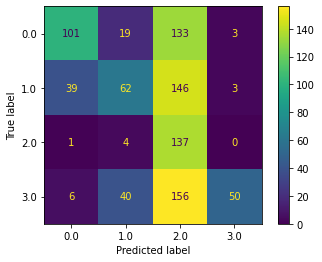

In [54]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(labels, predictions)